In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.



# Laboratorio Parte 1: Keras, MNIST data y redes totalmente conectadas (FC)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from PIL import Image
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import RMSprop
from tensorflow.examples.tutorials.mnist import input_data

from IPython.display import Image as IPImage

Using TensorFlow backend.


In [3]:
sns.set_style("white")

In [4]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [5]:
# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Documentación de Keras: https://keras.io/

## Exploración del dataset

In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
# Dimensiones de la data
print(f"Imagenes de Entrenamiento: {X_train.shape}")
print(f"Labels de Entrenamiento  : {y_val.shape}")
print()
print(f"Imagenes de Validacion   : {X_val.shape}")
print(f"Labels de Validacion     : {y_val.shape}")
print()
print(f"Imagenes de Testeo       : {X_test.shape}")
print(f"Labels de Testeo         : {y_test.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento  : (5000, 10)

Imagenes de Validacion   : (5000, 784)
Labels de Validacion     : (5000, 10)

Imagenes de Testeo       : (10000, 784)
Labels de Testeo         : (10000, 10)


In [8]:
##### Some Constants #####
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

BATCH_SIZE = 32
NUM_EPOCHS = 10

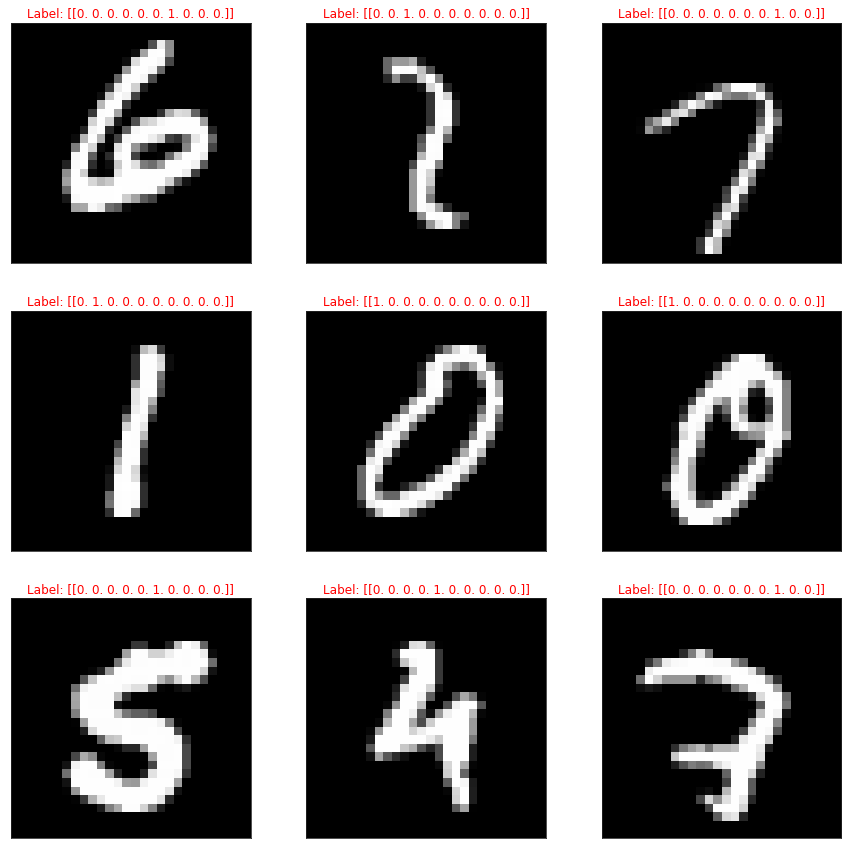

In [9]:
# Visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=55000, size=1)

        ax[i,j].imshow(X_train[random_image].reshape(28, 28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(f'Label: {y_train[random_image]}', color='r')

# fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Definición y entrenamiento del Modelo

In [10]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida
### Utilizar funciones Input(), Dense()

# https://keras.io/getting-started/functional-api-guide/

inputs = Input(shape=(IMG_ROWS * IMG_COLS,))
layer1 = Dense(64, activation='relu')(inputs)
layer2 = Dense(64, activation='relu')(layer1)
outputs = Dense(NUM_CLASSES, activation='softmax')(layer2)

In [11]:
### A completar: definir entrada y salida del modelo
model = Model(
    inputs=inputs,
    outputs=outputs
)

In [12]:
### A completar: definir optimizador y funcion de costo

# https://keras.io/examples/mnist_mlp/

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(
    filepath,
    monitor='loss',
    verbose=1,
    save_best_only=True
)

In [15]:
%%time
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[model_checkpoint]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/10





55000/55000 [==============================] - 3s 63us/step - loss: 0.2782 - acc: 0.9188 - val_loss: 0.1331 - val_acc: 0.9644

Epoch 00001: loss improved from inf to 0.27824, saving model to prueba1.h5
Epoch 2/10
55000/55000 [==============================] - 3s 55us/step - loss: 0.1320 - acc: 0.9614 - val_loss: 0.1203 - val_acc: 0.9660

Epoch 00002: loss improved from 0.27824 to 0.13201, saving model to prueba1.h5
Epoch 3/10
55000/55000 [==============================] - 3s 55us/step - loss: 0.1023 - acc: 0.9701 - val_loss: 0.1138 - val_acc: 0.9668

Epoch 00003: loss improved from 0.13201 to 0.10233, saving model to prueba1.h5
Epoch 4/10
55000/55000 [==============================] - 3s 55us/step - loss: 0.0862 - acc: 0.9751 - val_loss: 0.1130 - val_acc: 0.9698

Epoch 00004: loss improved from 0.10233 to 0.08616, saving model

Text(0,0.5,'Loss')

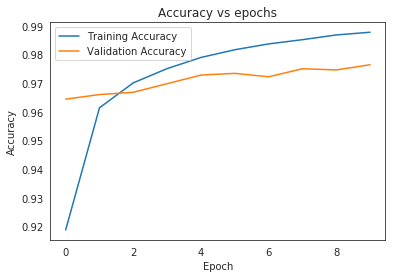

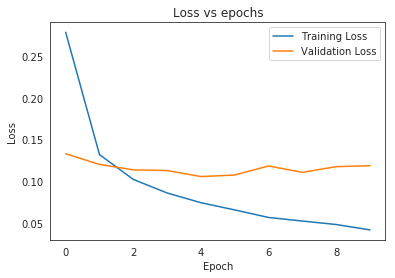

In [16]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [17]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss    : {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 0s 21us/step
Test loss    : 0.12696231113243556
Test accuracy: 0.9728


## Usemos este modelo para hacer predicciones

In [18]:
## A completar: utilizar imagenes de testeo

predictions = model.predict(X_test)
print(predictions.shape)

(10000, 10)


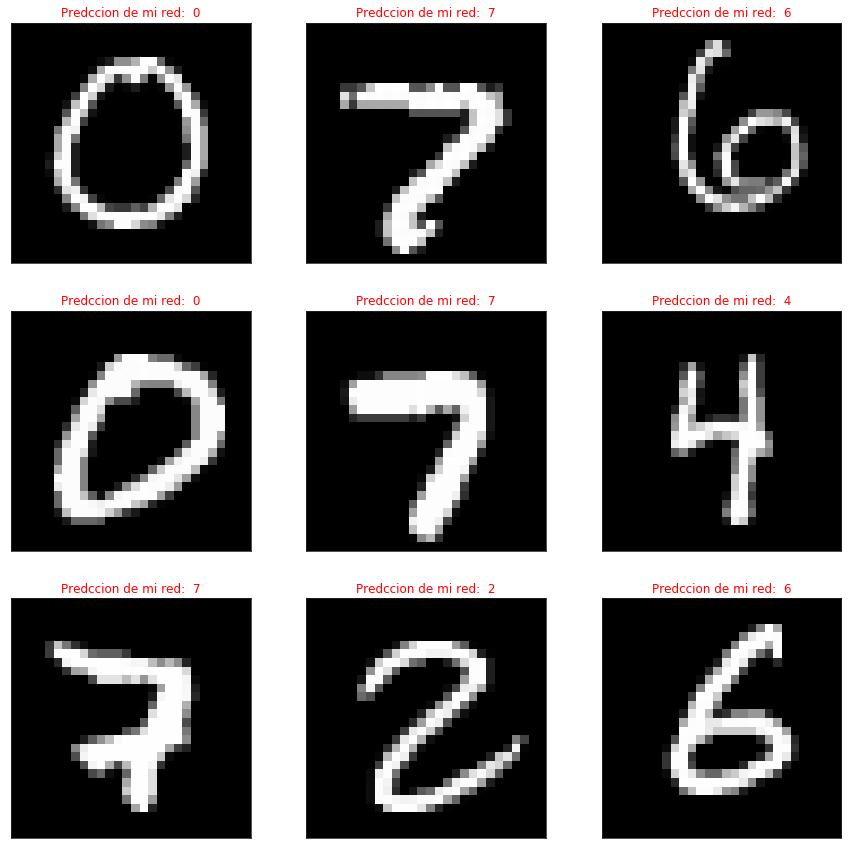

In [19]:
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=1000, size=1)

        ax[i,j].imshow(X_test[random_image].reshape(28,28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(f'Predccion de mi red:  {np.argmax(predictions[random_image])}', color='r')

plt.show()